## Project -1: Statistical NLP
#### By Ajay Kumar

• DOMAIN: Digital content management

• CONTEXT: Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles, 
etc. is written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to 
create a classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classification problem.

• DATA DESCRIPTION: Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected 
posts of 19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million 
words - or approximately 35 posts and 7250 words per person. Each blog is presented as a separate file, the name of which indicates a 
blogger id# and the blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for many, 
industry and/or sign is marked as unknown.) All bloggers included in the corpus fall into one of three age groups:

• 8240 "10s" blogs (ages 13-17), 

• 8086 "20s" blogs(ages 23-27) and 

• 2994 "30s" blogs (ages 33-47)

For each age group, there is an equal number of male and female bloggers.
Each blog in the corpus includes at least 200 occurrences of common English words. All formatting has been stripped with two exceptions. 
Individual posts within a single blogger are separated by the date of the following post and links within a post are denoted by the label url 
link. Link to dataset: https://www.kaggle.com/rtatman/blog-authorship-corpus

In [1]:
#Connect Google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Setting the Project path

In [4]:
path = '/content/drive/MyDrive/NLP Project'

In [5]:
%cd /content/drive/MyDrive/NLP Project

/content/drive/MyDrive/NLP Project


Checking the zip and unziping

In [6]:
!ls -l

total 1272461
-rw------- 1 root root 800419647 Aug 19 10:25  blogtext.csv
-rw------- 1 root root     55501 Aug 23 21:20  case_study_Sequence_Tagging_week3_nlp_aiml_online.ipynb
-rw------- 1 root root     57938 Aug 23 14:23 'case_study_Sequence_Tagging_week4_nlp_aiml_online_glove (2).ipynb'
-rw------- 1 root root    796852 Aug 26 15:53  Final_of_Project_1_Statistical_NLP.ipynb
-rw------- 1 root root 501494860 Aug 19 10:47  glove-wiki-gigaword-300.txt
-rw------- 1 root root    173195 Aug 23 20:19  Project_1_Statistical_NLP.ipynb


In [7]:
# !unzip \*.zip

## Q1. Import and analyse the data set.

In [8]:
# Importing the required library
import pandas as pd
import numpy as np

In [175]:
df = pd.read_csv('/content/drive/MyDrive/NLP Project/blogtext.csv')
print(df.shape)
df.head()

(681284, 7)


,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [176]:
df.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


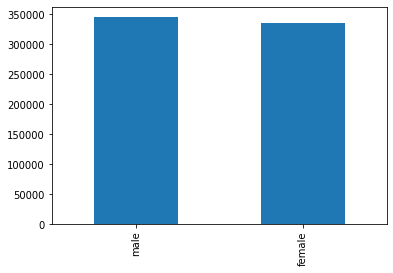

In [178]:
df['gender'].value_counts().plot(kind='bar');

The No. of males and females bloggers are almost similler 

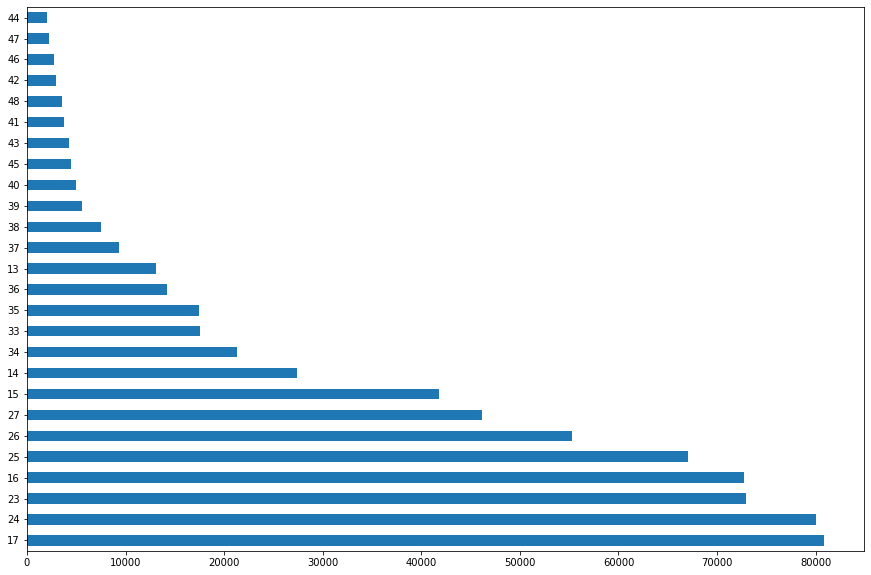

In [179]:
df['age'].value_counts().sort_values(ascending=False).plot(kind='barh',figsize=(15,10));

The maximum no. of bloggers are between the age of 14 - 27 years.

People at higher age from 37 and above are not active as young generation for blogging. 

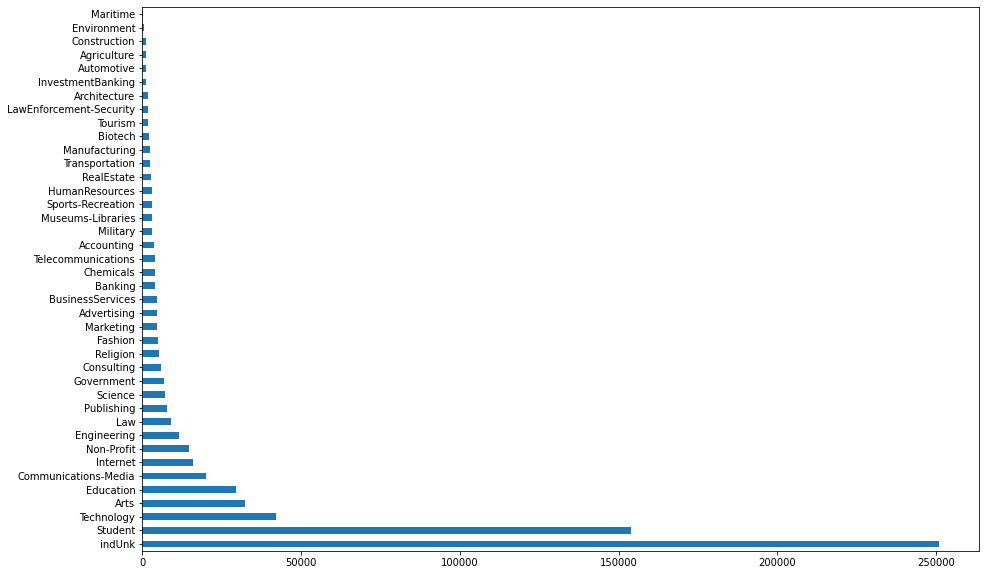

In [180]:
df['topic'].value_counts().plot(kind='barh', figsize=(15,10));

Most of the bloggers are taking about IndUnk and Student.
Lowest are maritime and environment

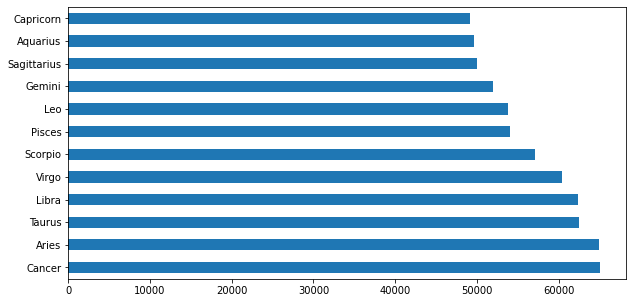

In [181]:
df['sign'].value_counts().plot(kind='barh', figsize=(10,5));

The astrological sign is not a good identifier for type of bloggers

In [182]:
# Randon checking the Blogs
num = np.random.randint(0, df.shape[0])
gender = df.loc[num, 'gender']
age = df.loc[num, 'age']
topic = df.loc[num, 'topic']
sign = df.loc[num, 'sign']
blog = df.loc[num, 'text']
print(gender)
print(age)
print(topic)
print(sign)
print(blog)

male
17
Manufacturing
Scorpio
       WEll mikes party was tonite, as was the last time I get to see annie for a long time. The party was very good. I kissed chow on the lips, it was funny. I had an awsome costume, so did annie. WE got mike really bad porn, lube, and a bunch of stuff from the dollar store to make him laugh. It worked. Im really going to miss annie and im going to do my damnedest to keep fateful to her. I cant even begin to imagine betraying her like that. So i think ill do ok.     


In [183]:
# Taking the sample of the dataset
data = df.sample(n=20000, random_state=1,)
data.reset_index(inplace=True, drop=True)
print(data.shape)

(20000, 7)


## Q2. Perform data pre-processing on the data:
• Data cleansing by removing unwanted characters, spaces, stop words etc. Convert text to lowercase.

• Target/label merger and transformation

• Train and test split

• Vectorisation, etc.

Remove HTML Tags

In [184]:
# defining a function to clean the data
from bs4 import BeautifulSoup
def strip_html_tags(text):
  soup = BeautifulSoup(text, 'html.parser')
  text = soup.get_text()
  return text

Remove Accented Characters

In [185]:
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

Remove Special Characters

In [186]:
import re
def remove_special_characters(text, remove_digits=False):
  # Using regex
  pattern= r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
  text = re.sub(pattern, '', text)
  return text

Lemmatization

In [187]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
def lemmatize_text(text):
  lemmatizer = WordNetLemmatizer()
  text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
  return text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Stemming

In [188]:
def simple_stemmer(text):
  ps = nltk.porter.PorterStemmer()
  text = ' '.join([ps.stem(word) for word in text.split()])
  return text

Building a text normalizer

In [189]:
def normalize_corpus(corpus, html_stripping=True, accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

Pre-process and normalize the text

In [190]:
# Making copy of Dataset
# ds = df.copy(deep=True)
# ds.reset_index(inplace=True)
ds = data.copy(deep=True)

In [191]:
ds.head()

,id,gender,age,topic,sign,date,text
0,2764903,male,33,indUnk,Pisces,"25,June,2004",Let's say you have friends that hav...
1,2530499,male,15,Technology,Aries,"02,August,2004",Was officially the COOLEST FUCKING ...
2,3950263,male,17,Student,Gemini,"01,August,2004","Apparently, a few people consider..."
3,2990004,male,27,indUnk,Aries,"13,June,2004",His nose is too big for his face. Eyes...
4,1119280,female,27,indUnk,Gemini,"01,August,2004",urlLink urlLink 16-feb-04


In [192]:
# Normalizing the text by built function 
ds['clean_text'] = normalize_corpus(ds['text'])

In [193]:
 # Removing stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
ds['clean_text'] = ds['clean_text'].apply(lambda x: ' '.join([words for words in x.split() if words not in stopwords]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [194]:
# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stopwords]
    return ' '.join(no_stopword_text)

ds['clean_text'] = ds['clean_text'].apply(lambda x: remove_stopwords(x))

Created a normalized new feature with clean_text 

In [195]:
# Removing single character
def remove_single_character(text):
  pattern = r"\s+[a-zA-Z]\s+"
  text = re.sub(pattern, '', text)
  return text

In [196]:
ds['clean_text'] = ds['clean_text'].apply(remove_single_character)

In [197]:
# Removing Repeated charactres
def romove_repeated_character(text):
  pattern = r'([a-z])\1+'
  text = re.sub(pattern, '', text)
  return text

In [198]:
ds['clean_text'] = ds['clean_text'].apply(romove_repeated_character)

In [199]:
# Single character
def single_char(text):
  pattern =   r"\b[a-zA-Z]\b"
  text = re.sub(pattern, '', text)
  return text

In [200]:
ds['clean_text'] = ds['clean_text'].apply(single_char)

In [201]:
# Remove two short character
def two_character(text):
  pattern = r'\W*\b\w{1,2}\b'
  text = re.sub(pattern, '', text)
  return text

In [202]:
ds['clean_text'] = ds['clean_text'].apply(two_character)

In [203]:
# Repeated words
def repeated_words(text):
  pattern = r"\b(\w+)(?:\W\1\b)+"
  text = re.sub(pattern, '', text)
  return text

In [204]:
ds['clean_text'] = ds['clean_text'].apply(repeated_words)

In [205]:
# Garbage cleaning 
def Garbage_clean(text):
  pattern = r'(\w*(?:[^a-zA-Z0-9_ \t\n\r\f\v,.?!;:]\w*)+)'
  text = re.sub(pattern, '', text)
  return text

In [206]:
ds['clean_text'] = ds['clean_text'].apply(Garbage_clean)

In [207]:
# Randomly checking the cleaned text with the no of words in each bloggs
num = np.random.randint(0, ds.shape[0])
cleaned_text = ds.loc[num, 'clean_text']

no_of_words = len(ds.loc[num, 'clean_text'].split())
print(no_of_words)
print(cleaned_text)

25
argh went work today auming scheduled work july holiday wayport ala meant promptly left came right back home thankfuy traic lite due absence worker today


In [208]:
norm_corpus = list(ds['clean_text'])
norm_corpus

['lets say friend std past return always friend lets suose suenly decide something friend wrong friend dont care think either naturay friend get angry suort thing furthermore think youre ahole ignoring advice going ahead stupid plan anyway point urink nato wiing helpiraq pied ignored advice',
 ' oiciay clest fucking day ever blake brother ashley suivan went dixon res fish hour decide walk keys mile reay walk walked acro strt front lives open front time get driveway think sorta kinda suprised turn blake insane maybe blake fishing puing fun though kel wish could come would loved insanity also friday plan camping horsetth capacity',
 'aarently people considered cory gang maive amount red wears intrigued form something another episode around corys widespread fascination color red however elongate anything idea involving obseion cory story post coent thanks advance',
 'nose big face eyes soft lile browns intimately engaging big nose lipsthe lip nice top thin boom preed mine lying flr next s

**After cleaning the text with multiple techniques still there is ther is lots of sort words in the corpus cab be seen above**

In [209]:
# Creating a taget variable using gender, age, topic and sign
ds['target'] = ds[['gender','age', 'topic','sign']].apply(lambda x: [str(y) for y in x], axis=1)

In [210]:
ds.head()

,id,gender,age,topic,sign,date,text,clean_text,target
0,2764903,male,33,indUnk,Pisces,"25,June,2004",Let's say you have friends that hav...,lets say friend std past return always friend ...,"[male, 33, indUnk, Pisces]"
1,2530499,male,15,Technology,Aries,"02,August,2004",Was officially the COOLEST FUCKING ...,oiciay clest fucking day ever blake brother a...,"[male, 15, Technology, Aries]"
2,3950263,male,17,Student,Gemini,"01,August,2004","Apparently, a few people consider...",aarently people considered cory gang maive amo...,"[male, 17, Student, Gemini]"
3,2990004,male,27,indUnk,Aries,"13,June,2004",His nose is too big for his face. Eyes...,nose big face eyes soft lile browns intimately...,"[male, 27, indUnk, Aries]"
4,1119280,female,27,indUnk,Gemini,"01,August,2004",urlLink urlLink 16-feb-04,feb,"[female, 27, indUnk, Gemini]"


In [211]:
ds.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text', 'clean_text',
       'target'],
      dtype='object')

In [212]:
ds.drop(columns=['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], axis=1, inplace=True)

In [213]:
ds.head()

,clean_text,target
0,lets say friend std past return always friend ...,"[male, 33, indUnk, Pisces]"
1,oiciay clest fucking day ever blake brother a...,"[male, 15, Technology, Aries]"
2,aarently people considered cory gang maive amo...,"[male, 17, Student, Gemini]"
3,nose big face eyes soft lile browns intimately...,"[male, 27, indUnk, Aries]"
4,feb,"[female, 27, indUnk, Gemini]"


In [214]:
print(len(ds.loc[0, 'clean_text'].split())) # Checking the no. of words in bloggs
print(ds.loc[0, 'clean_text'])

45
lets say friend std past return always friend lets suose suenly decide something friend wrong friend dont care think either naturay friend get angry suort thing furthermore think youre ahole ignoring advice going ahead stupid plan anyway point urink nato wiing helpiraq pied ignored advice


Spliting the data into Train and Test

In [215]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ds['clean_text'], ds['target'], test_size=0.30, random_state=1, shuffle=True)

In [216]:
# Checking the shape
print(X_train.shape)
print(y_train.shape)
print('\n')
print(X_test.shape)
print(y_test.shape)

(14000,)
(14000,)


(6000,)
(6000,)


In [217]:
X_train[2]

'aarently people considered cory gang maive amount red wears intrigued form something another episode around corys widespread fascination color red however elongate anything idea involving obseion cory story post coent thanks advance'

In [218]:
# Vectorizing the features.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [219]:
cvt = CountVectorizer(max_df=0.8, max_features=10000)

In [220]:
# Fitting on training data
X_train_cv = cvt.fit_transform(X_train)
print(X_train_cv[0])

  (0, 4106)	1
  (0, 3038)	1
  (0, 9612)	1
  (0, 7664)	1
  (0, 8941)	1
  (0, 5035)	1
  (0, 3907)	3
  (0, 2211)	1
  (0, 5234)	1
  (0, 4130)	1
  (0, 7259)	1
  (0, 8937)	1
  (0, 8272)	1
  (0, 7117)	1
  (0, 5140)	1
  (0, 8121)	1
  (0, 415)	2
  (0, 8306)	1
  (0, 9807)	1
  (0, 9879)	1
  (0, 8422)	1
  (0, 8776)	2
  (0, 8347)	1
  (0, 4008)	1
  (0, 3931)	1
  (0, 8845)	1
  (0, 9009)	1
  (0, 8234)	1
  (0, 86)	1


In [221]:
# Fitting on testing data
X_test_cv = cvt.transform(X_test)

In [222]:
len(cvt.vocabulary_)

10000

In [223]:
X_train_cv.shape # checking the shape of the training data

(14000, 10000)

In [224]:
# Vectorizing the features using Tfidf
tfidf = TfidfVectorizer()

In [225]:
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

In [226]:
len(tfidf.vocabulary_)

85368

#### we need to transform labels in a binary form and the prediction will be a mask of 0s and 1s. using MultiLabelBinarizer from sklearn

In [227]:
from sklearn.preprocessing import MultiLabelBinarizer

In [228]:
label_counts = dict()
for labels in ds['target'].values:
  for label in labels:
    if label in label_counts:
      label_counts[label]+=1
    else:
      label_counts[label] =1

In [229]:
label_counts

{'13': 365,
 '14': 810,
 '15': 1222,
 '16': 2155,
 '17': 2443,
 '23': 2188,
 '24': 2353,
 '25': 1974,
 '26': 1557,
 '27': 1344,
 '33': 529,
 '34': 582,
 '35': 494,
 '36': 403,
 '37': 293,
 '38': 221,
 '39': 159,
 '40': 158,
 '41': 98,
 '42': 84,
 '43': 135,
 '44': 50,
 '45': 119,
 '46': 104,
 '47': 58,
 '48': 102,
 'Accounting': 133,
 'Advertising': 155,
 'Agriculture': 41,
 'Aquarius': 1421,
 'Architecture': 59,
 'Aries': 2002,
 'Arts': 987,
 'Automotive': 35,
 'Banking': 116,
 'Biotech': 59,
 'BusinessServices': 120,
 'Cancer': 1865,
 'Capricorn': 1450,
 'Chemicals': 105,
 'Communications-Media': 633,
 'Construction': 26,
 'Consulting': 190,
 'Education': 812,
 'Engineering': 313,
 'Environment': 20,
 'Fashion': 143,
 'Gemini': 1532,
 'Government': 196,
 'HumanResources': 84,
 'Internet': 452,
 'InvestmentBanking': 49,
 'Law': 251,
 'LawEnforcement-Security': 67,
 'Leo': 1560,
 'Libra': 1801,
 'Manufacturing': 74,
 'Maritime': 11,
 'Marketing': 134,
 'Military': 83,
 'Museums-Librari

In [230]:
mlb = MultiLabelBinarizer(classes=sorted(label_counts))

In [231]:
y_train[1]

['male', '15', 'Technology', 'Aries']

In [232]:
y_train_mlb = mlb.fit_transform(y_train)

In [233]:
print(y_train_mlb[1])

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 1]


In [234]:
y_test_mlb = mlb.transform(y_test)
print(y_test_mlb[1])

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0]


## 3. Design, train, tune and test the best text classifier

In [235]:
# Importing necessary library
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

In [236]:
# Logistic Regression with OnevsRest classifier
lr = LogisticRegression(class_weight='balanced',max_iter=500)
lr_ovr = OneVsRestClassifier(lr)
classifier = lr_ovr.fit(X_train_tf, y_train_mlb)

In [237]:
ytrain_pred = classifier.predict(X_train_tf)
# Accuracy on test data
print('Accuracy score:', accuracy_score(y_train_mlb, ytrain_pred))

Accuracy score: 0.26707142857142857


In [238]:
ytest_pred = classifier.predict(X_test_tf)
# Accuracy on test data
print('Accuracy score:', accuracy_score(y_test_mlb, ytest_pred))

Accuracy score: 0.006333333333333333


# Q4. Display and explain detail the classification report

In [239]:
# Defining a function to evaluate the classification report
def print_classification(y_test, y_pred):
  print('Accuracy score:', accuracy_score(y_test, y_pred))
  print('Average Precision score', average_precision_score(y_test, y_pred, average='micro'))
  print('Recall score', recall_score(y_test, y_pred, average='micro'))
  print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

In [240]:
print_classification(y_test_mlb, ytest_pred)

Accuracy score: 0.006333333333333333
Average Precision score 0.1309413492512624
Recall score 0.3425416666666667
F1 score:  0.3119036327421038


Precision is the ratio of true positives to the sum of true and false positives which is 7% here.

Recall is ratio of true positives to the sum of true positives and false negatives which is slightly good 55%.

The F1 score is a weighted harmonic mean of precision and recall. Here I F1 score should be used to compare classifier models which is 15%.

I have lots of technique to clean the data but the data is very complecated.

In [241]:
# Linear SCV with One vs Rest Classifier
lsvc = LinearSVC(class_weight='balanced', random_state=1, C=0.1)
ovr_lsvc = OneVsRestClassifier(lsvc)

In [242]:
clf = ovr_lsvc.fit(X_train_tf, y_train_mlb)

In [243]:
ytest_pred = clf.predict(X_test_tf)
# Accuracy on test data
print('Accuracy score:', accuracy_score(y_test_mlb, ytest_pred))

Accuracy score: 0.006


In [244]:
# Defining a function to evaluate the classification report
print_classification(y_test_mlb, ytest_pred)

Accuracy score: 0.006
Average Precision score 0.1307949293332874
Recall score 0.3443333333333333
F1 score:  0.3116550072596308


Precision is the ratio of true positives to the sum of true and false positives which is 12% here.

Recall is ratio of true positives to the sum of true positives and false negatives which is slightly good 38%.

The F1 score is a weighted harmonic mean of precision and recall. Here I F1 score should be used to compare classifier models which is 28%.

I have lots of technique to clean the data but the data is very complecated.

# Q5. Print the true vs predicted labels for any 5 entries from the dataset

In [245]:
# Defining a function to clean the text
def clean_text(text):
    text = re.sub("\'", "", text) 
    text = re.sub("[^a-zA-Z]"," ",text) 
    text = ' '.join(text.split()) 
    text = text.lower() 
    return text

In [246]:
# remove stopwords, vetorization and label transformation
def infer_tags(text):
    text = clean_text(text)
    text = remove_stopwords(text)
    text_vec = tfidf.transform([text])
    text_pred = classifier.predict(text_vec)
    return mlb.inverse_transform(text_pred)

In [247]:
# Printing 5 prediction
for i in range(5):
  num = X_test.sample(1).index[0]
  print('Actual label', ds['target'][num])
  print('Model predicted', infer_tags(X_test[num]))
  print('\n')

Actual label ['male', '41', 'Technology', 'Scorpio']
Model predicted [('27', 'Cancer', 'Pisces', 'female')]


Actual label ['female', '25', 'indUnk', 'Gemini']
Model predicted [('male',)]


Actual label ['female', '17', 'indUnk', 'Taurus']
Model predicted [('17', '23', 'Government', 'Libra', 'male')]


Actual label ['male', '23', 'Student', 'Virgo']
Model predicted [('23', '26', 'Arts', 'Libra', 'Non-Profit', 'female')]


Actual label ['female', '13', 'indUnk', 'Leo']
Model predicted [('Arts', 'Gemini', 'Non-Profit', 'female')]




**After multiple hyperparameter tuning 31% f1 score is achieved.
the model is giving better accuracy on the test data**

**The other option to improve the f1 score is build the model seperately for each class and compare the reslt**

## Build the Tokenizer using tensorflow and keras

In [172]:
import tensorflow as tf

In [250]:
desired_vocab_size = 5000 # Vocablury size
t = tf.keras.preprocessing.text.Tokenizer(num_words=desired_vocab_size, oov_token='OOV')

In [251]:
#Fit tokenizer with actual training data
t.fit_on_texts(X_train.tolist())

In [252]:
# t.index_word # Vocablury

#### Prepare Training and Test Data

In [253]:
print(X_train[1]) # Before Tokenization

 oiciay clest fucking day ever blake brother ashley suivan went dixon res fish hour decide walk keys mile reay walk walked acro strt front lives open front time get driveway think sorta kinda suprised turn blake insane maybe blake fishing puing fun though kel wish could come would loved insanity also friday plan camping horsetth capacity


In [254]:
X_train = t.texts_to_sequences(X_train)

In [255]:
print(X_train[0]) # After Tokenization

[262, 88, 147, 20, 10, 519, 54, 11, 149, 54, 1383, 1, 1316, 13, 236, 90, 1335, 837, 109, 3565, 196, 12, 282, 121, 1229, 168, 2827, 1, 109, 2702, 1522, 1, 54, 1310, 121, 1]


In [256]:
X_test = t.texts_to_sequences(X_test)
print(X_test[0])

[409, 70, 226, 4999, 456, 859, 78, 42, 227, 1075, 282, 313, 428, 79, 7, 10]


### Pad Sequences - for Train and Test

In [257]:
#Define maximum number of words to consider in each text
max_review_length = 50

In [258]:
#Pad training text
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_review_length, padding='pre', truncating='post')
#Pad test text
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_review_length, padding='pre', truncating='post')

In [259]:
print(X_train.shape)
print(X_test.shape)

(14000, 50)
(6000, 50)


In [260]:
# Random visualizatiom after padding
num = np.random.randint(0, X_train.shape[0])
print(X_train[num])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0  156    9   73  108   29   39
  137  280   16    8 4615    1  637  435   10 3697 1570 3822    1 1886
 3287    1   60 1167    1 3261   74  108]


## Loading Glove Word2Vec model for Embedding

In [261]:
import gensim.downloader as api

In [262]:
#Load Glove model (similar to Word2Vec)
glove_model = api.load('glove-wiki-gigaword-50')

In [263]:
# glove_model.save('glove-wiki-gigaword-50.txt')

In [ ]:
# # Loading the saved model
# import warnings
# warnings.filterwarnings('ignore')
# from sklearn.externals import joblib
# filename = '/content/drive/MyDrive/AIML/NLP/Project/glove-wiki-gigaword-100.txt.vectors.npy'

In [ ]:
# glove_model = joblib.load(filename)

In [265]:
# Top 10 similler and embedding for word education from pre trained model
glove_model.most_similar('brother')

[('son', 0.9449328184127808),
 ('cousin', 0.9340511560440063),
 ('father', 0.9322627782821655),
 ('nephew', 0.9301478266716003),
 ('uncle', 0.9147958755493164),
 ('friend', 0.8713178634643555),
 ('elder', 0.8581331968307495),
 ('grandson', 0.8516242504119873),
 ('sons', 0.8418696522712708),
 ('grandfather', 0.8392235040664673)]

In [266]:
# Size of the model
glove_model.vectors.shape

(400000, 50)

In [267]:
# #Model's vocab
# glove_model.index2word

### Getting Pre-trained Embeddings

In [268]:
embedding_vector_lenght = glove_model.vector_size
embedding_vector_lenght

50

In [269]:
#Initialize embedding matrix for our dataset with 5000+1 rows (1 for padding word)
#and 100 columns (as embedding size is 100)

embedding_matrix = np.zeros((desired_vocab_size+1, embedding_vector_lenght))

In [270]:
embedding_matrix.shape

(5001, 50)

In [271]:
embedding_matrix[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [272]:
#Loading word vectors for each word from glove Word2Vec model
for word, i in sorted(t.word_index.items(), key= lambda x: x[1]):
  if i > desired_vocab_size+1:
    break
  try:
    embedding_vector = glove_model[word] # Reading word embedding from glove model
    embedding_matrix[i] = embedding_vector
  except:
    pass

In [273]:
# Random visualizatiom after embedding
num = np.random.randint(0, embedding_matrix.shape[0])
print(embedding_matrix[num])

[ 0.099114   -0.26446     0.99615997 -0.13026001 -0.48561001  1.59379995
  0.37364     0.099604   -2.06040001 -1.09909999  0.21199    -1.14209998
 -0.68616003  0.51450998 -1.00020003  0.15093     0.30307001  0.13790999
  0.47323999  0.012662   -0.53834999 -0.78587002  0.16001     0.16743
  0.25720999 -0.55347002 -0.079843   -0.10205    -1.58490002  0.93028998
  0.75174999  1.07369995 -0.64042997  0.34994    -1.11150002 -1.02530003
 -0.23021001  0.96091002  0.78376001 -0.19215     0.049719   -0.23623
 -0.88006002 -0.27677    -0.33320999  0.043999   -0.74900001  0.32596001
  0.84811002  0.041835  ]


In [274]:
# Shape of the embedding matrix 
embedding_matrix.shape

(5001, 50)

In [275]:
print(y_train_mlb.shape)

(14000, 80)


## Build Model - Dense Layers

In [276]:
# Initializing the model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

In [277]:
# Embedding layer
model.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                                    embedding_vector_lenght, #Embedding size
                                    weights=[embedding_matrix], #Embeddings taken from pre-trained model
                                    trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                                    input_length=max_review_length) #Number of words in each review
          )

In [278]:
model.output

<KerasTensor: shape=(None, 50, 50) dtype=float32 (created by layer 'embedding')>

In [279]:
# LSTM 1
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)))

In [280]:
model.output

<KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'bidirectional')>

In [281]:
# Dropout
model.add(tf.keras.layers.Dropout(0.5))

In [282]:
model.output

<KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'dropout_1')>

In [283]:
model.add(tf.keras.layers.Dense(80, activation='sigmoid'))

In [284]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 50)            250050    
_________________________________________________________________
dropout (Dropout)            (None, 50, 50)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 100)               40400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 80)                8080      
Total params: 298,530
Trainable params: 48,480
Non-trainable params: 250,050
_________________________________________________________________


In [285]:
early =  tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, min_delta=0.0001, mode='auto')
reduce_learning = tf.keras.callbacks.ReduceLROnPlateau(patience=5, verbose=1, min_lr=1e-6)
claaback_list = [early, reduce_learning]

In [286]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [287]:
model.fit(X_train, y_train_mlb, epochs=50, validation_data=(X_test, y_test_mlb), batch_size=32)

Epoch 1/50
438/438 [==============================] - 24s 37ms/step - loss: 0.1881 - accuracy: 0.0014 - val_loss: 0.1465 - val_accuracy: 0.0000e+00
Epoch 2/50
438/438 [==============================] - 15s 35ms/step - loss: 0.1513 - accuracy: 0.0000e+00 - val_loss: 0.1462 - val_accuracy: 0.0000e+00
Epoch 3/50
438/438 [==============================] - 15s 35ms/step - loss: 0.1497 - accuracy: 0.0000e+00 - val_loss: 0.1459 - val_accuracy: 0.0000e+00
Epoch 4/50
438/438 [==============================] - 15s 35ms/step - loss: 0.1487 - accuracy: 0.0000e+00 - val_loss: 0.1452 - val_accuracy: 0.0000e+00
Epoch 5/50
438/438 [==============================] - 15s 35ms/step - loss: 0.1479 - accuracy: 0.0000e+00 - val_loss: 0.1450 - val_accuracy: 0.0000e+00
Epoch 6/50
438/438 [==============================] - 15s 35ms/step - loss: 0.1476 - accuracy: 0.0000e+00 - val_loss: 0.1447 - val_accuracy: 0.0000e+00
Epoch 7/50
438/438 [==============================] - 15s 34ms/step - loss: 0.1471 - accurac

**I tried improving model using Bidirectional LSTM but model is not able to learn.**

In [ ]:
# Converting to html file
!jupyter nbconvert --to html Part_2_Chatbot.ipynb